# TSF Task # 3 - To Explore Unsupervised Machine Learning

Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. In contrast to supervised learning that usually makes use of human-labeled data, unsupervised learning, also known as self-organization allows for modeling of probability densities over inputs.Two of the main methods used in unsupervised learning are principal component and cluster analysis. Cluster analysis is used in unsupervised learning to group, or segment, datasets with shared attributes in order to extrapolate algorithmic relationships

# Clustering

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

In [15]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [16]:
# Load the iris dataset
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names)

In [17]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### K Means Clustering

Here we are using Elbow Method to determine the optimum number of Clusters.

In [18]:
x = df_iris.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 40, n_init = 20, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

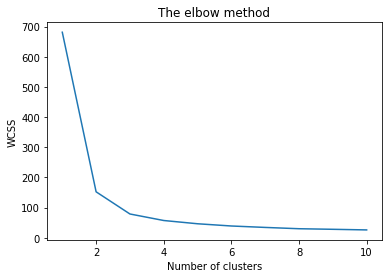

In [19]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From this we choose the number of clusters as '3'.

Now, applying K Means Clustering to the dataset

In [20]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_km = kmeans.fit_predict(x)

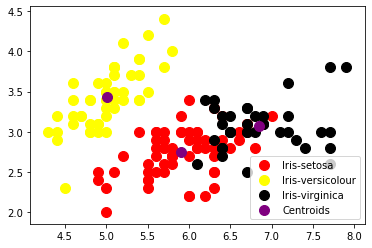

In [21]:
# Visualising the clusters 
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 100, c = 'black', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'purple', label = 'Centroids')
plt.legend()

#### Hierarchial Clustering

We will plot dendogram to determine optimum number of clusters.

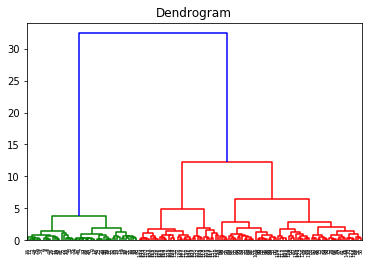

In [22]:
import scipy.cluster.hierarchy as sch
dg = sch.dendrogram(sch.linkage(x, method= 'ward'))
plt.title('Dendrogram')
plt.show()

From the dendogram we can clearly tell that the total number of optimum clusters will be '3'.